## **Customer Segmentation for Marketing Analysis**

#### 1. Importing All libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import joblib

#### 2. Data Collection and Exploration

In [3]:
df=pd.read_csv("customer_segmentation_data.csv",index_col=0)
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53
2,21,Female,78852,60,2,42,Sports,41.93
3,60,Female,126573,30,2,28,Clothing,424.36
4,40,Other,47099,74,9,5,Home & Garden,991.93
5,65,Female,140621,21,3,25,Electronics,347.08


In [4]:
data=df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 70.3+ KB


#### 3. Understanding the Data Structure

In [6]:
df.shape

(1000, 8)

In [7]:
df.dtypes

age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object

#### 4. Summary Statistics

In [8]:
df.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


#### 5. Checking Missing Values

In [9]:
df.isnull().sum()

age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

#### 6. Unique Values

In [10]:
df.nunique()
# df

age                      52
gender                    3
income                  996
spending_score          100
membership_years         10
purchase_frequency       50
preferred_category        5
last_purchase_amount    994
dtype: int64

#### 7. Data Distribution

##### Numerical Features

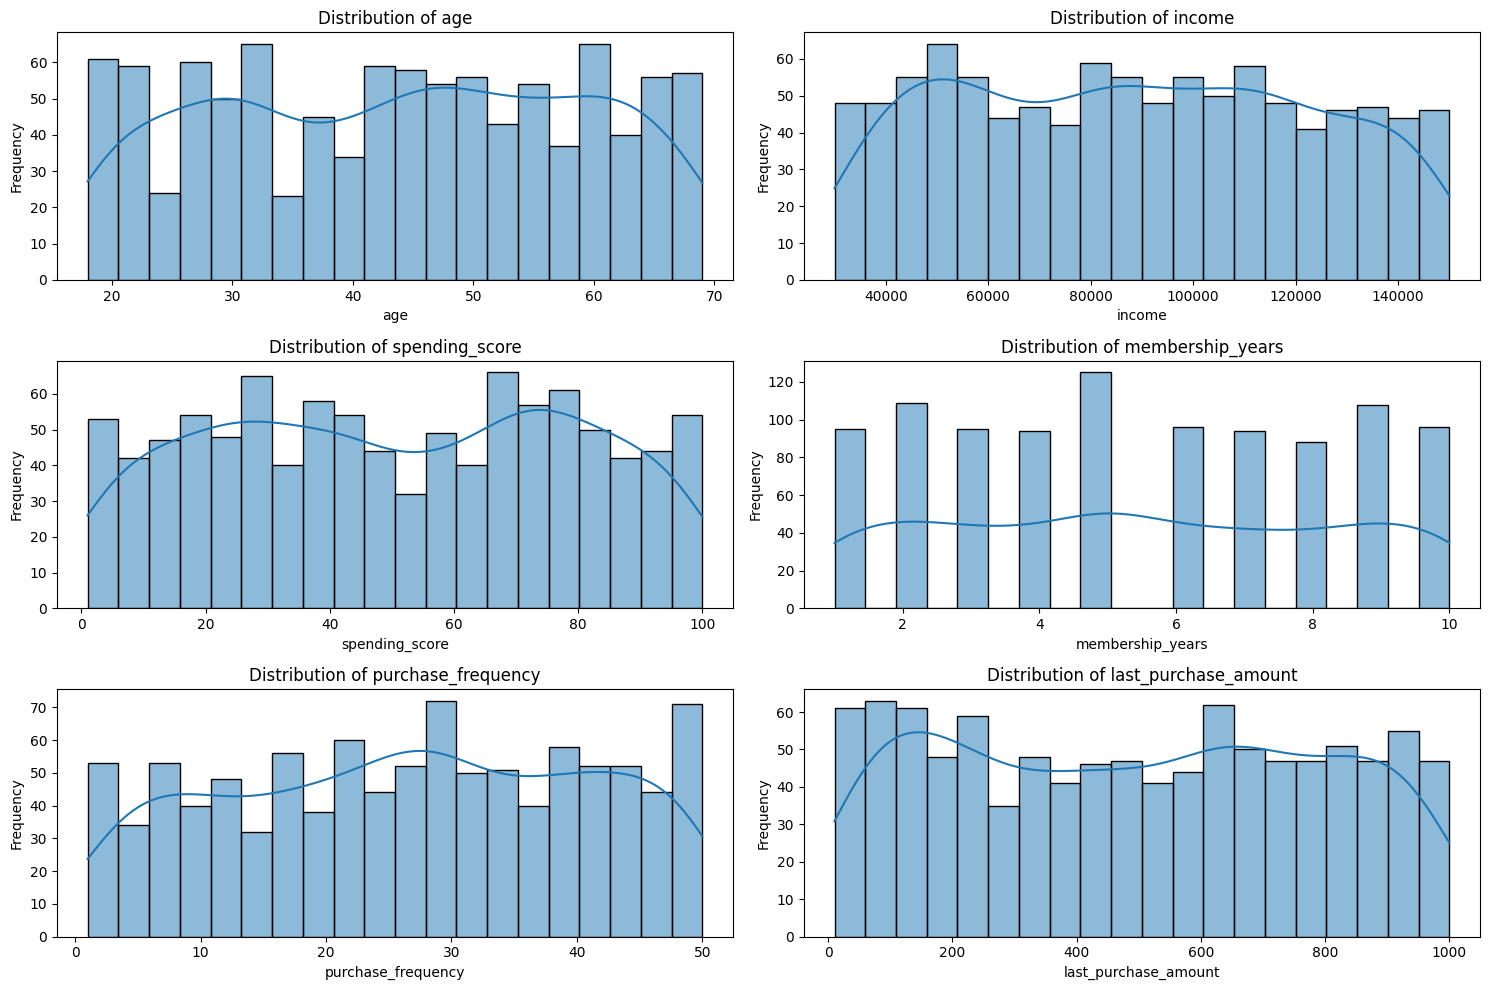

In [11]:
numerical_features = ['age', 'income', 'spending_score','membership_years','purchase_frequency','last_purchase_amount']

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    ax = axes[i // 2, i % 2]
    sns.histplot(data[feature], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

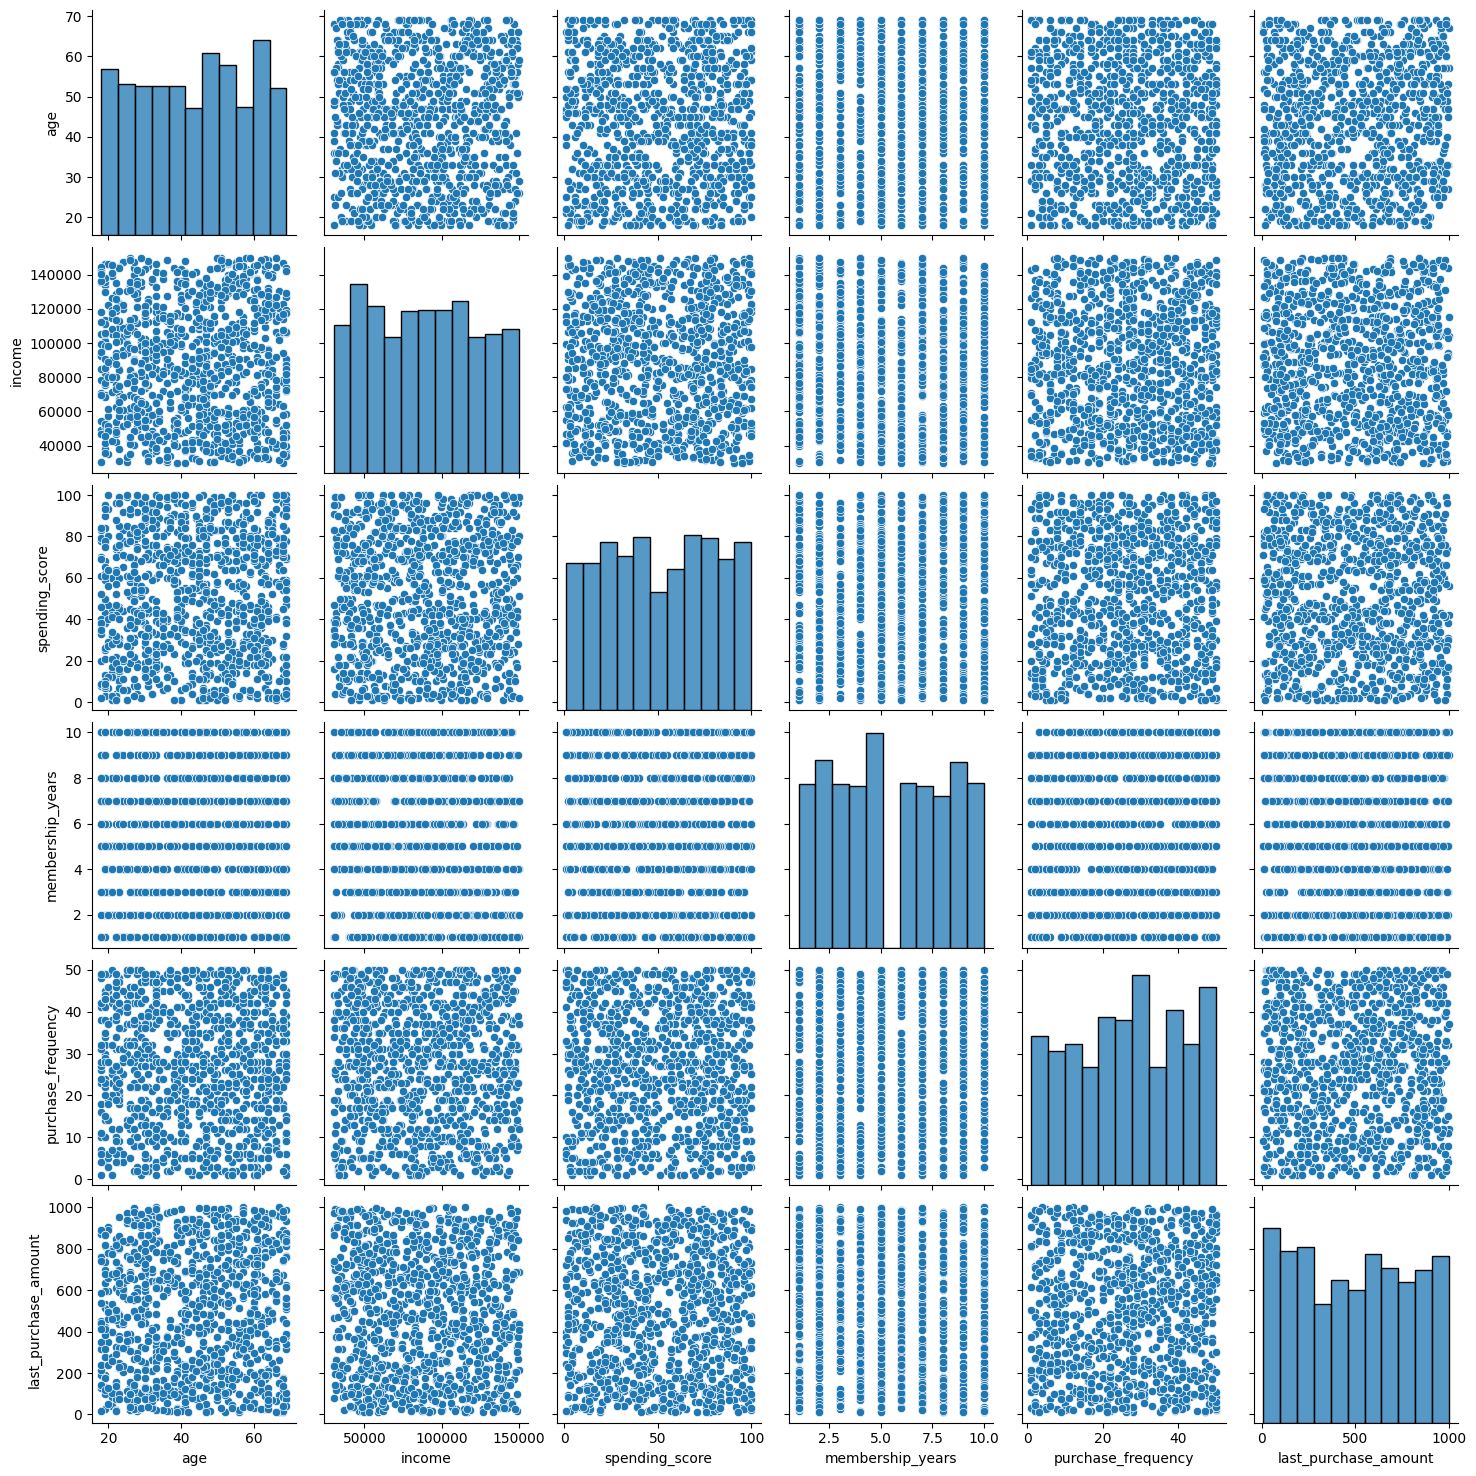

In [12]:
sns.pairplot(df)
plt.show()

##### Categorical Features

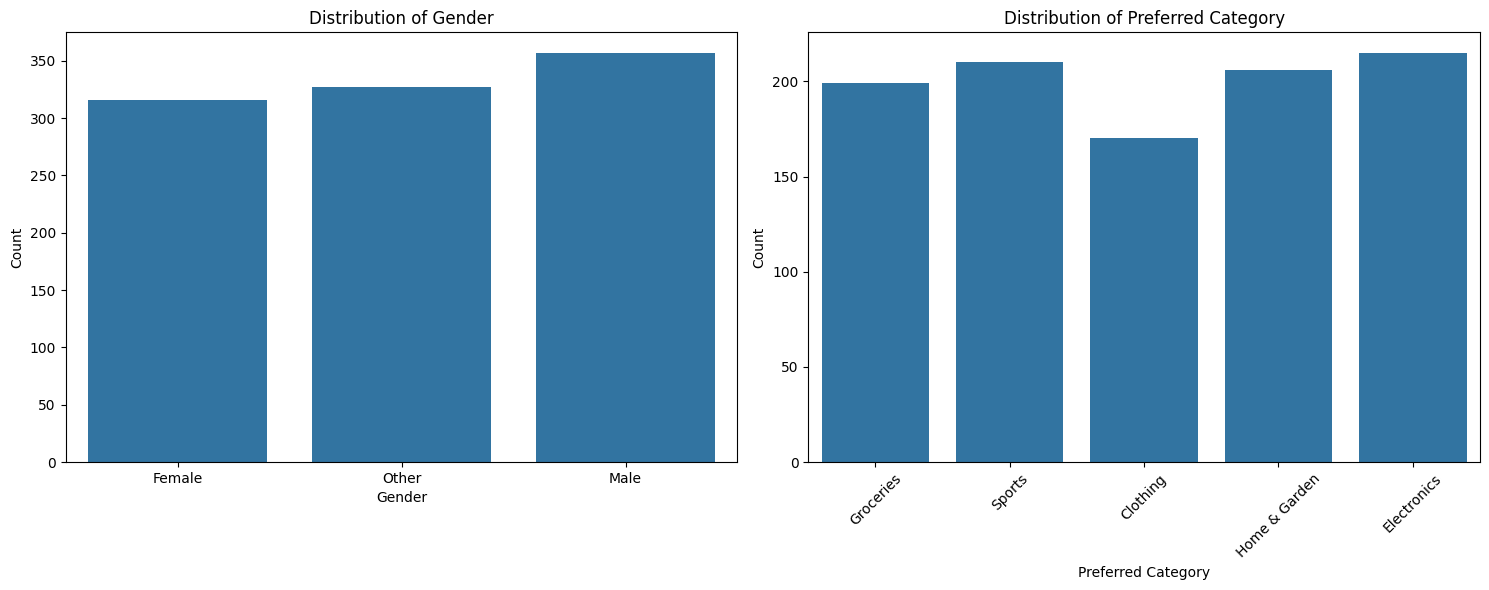

In [13]:
categorical_features = ['gender','preferred_category']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='gender',data=df,ax=axes[0])
axes[0].set_title('Distribution of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(x='preferred_category',data=df,ax=axes[1])
axes[1].set_title('Distribution of Preferred Category')
axes[1].set_xlabel('Preferred Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


#### 8. Correlation Analysis

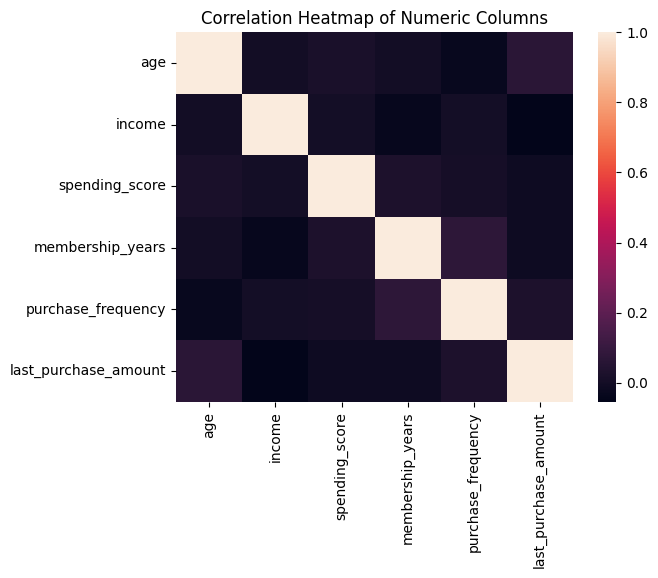

In [14]:
corr = df.select_dtypes("number").corr()
sns.heatmap(corr)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


### **Data Preprocesing**

In [15]:
df.drop_duplicates(inplace=True)


In [16]:
df.head(2)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53
2,21,Female,78852,60,2,42,Sports,41.93


#### 9. Scaling Numerical Values

In [17]:
columns_to_scale = ['age', 'income', 'spending_score','membership_years','purchase_frequency','last_purchase_amount']
data_to_scale = df[columns_to_scale]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_df.index =df.index
df[columns_to_scale] = scaled_df

print(df.head())
joblib.dump(scaler, "scaler.pkl")
df.head(2)


         age  gender    income  spending_score  membership_years  \
id                                                                 
1  -0.384644  Female  0.316868        1.358468         -0.865010   
2  -1.515362  Female -0.282016        0.321865         -1.215358   
3   1.078639  Female  1.112778       -0.714738         -1.215358   
4  -0.251618   Other -1.210096        0.805613          1.237080   
5   1.411203  Female  1.523374       -1.025718         -0.865010   

    purchase_frequency preferred_category  last_purchase_amount  
id                                                               
1            -0.182348          Groceries             -1.281540  
2             1.082005             Sports             -1.523763  
3             0.098620           Clothing             -0.230005  
4            -1.516943      Home & Garden              1.690080  
5            -0.112106        Electronics             -0.491443  


,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,-0.384644,Female,0.316868,1.358468,-0.865010,-0.182348,Groceries,-1.281540
2,-1.515362,Female,-0.282016,0.321865,-1.215358,1.082005,Sports,-1.523763


#### 10. Handling Categorical Data

In [18]:
df.select_dtypes("object").nunique()


gender                3
preferred_category    5
dtype: int64

In [19]:
df.head(2)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,-0.384644,Female,0.316868,1.358468,-0.865010,-0.182348,Groceries,-1.281540
2,-1.515362,Female,-0.282016,0.321865,-1.215358,1.082005,Sports,-1.523763


In [20]:
df = pd.get_dummies(df,columns=['gender','preferred_category'],drop_first=True)


In [21]:
df.head(2)

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
id,,,,,,,,,,,,
1,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,False,False,False,True,False,False
2,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,False,False,False,False,False,True


### **Model Building**

##### 11. Choosing No. of Clusters

C:\Users\ddeep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ddeep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

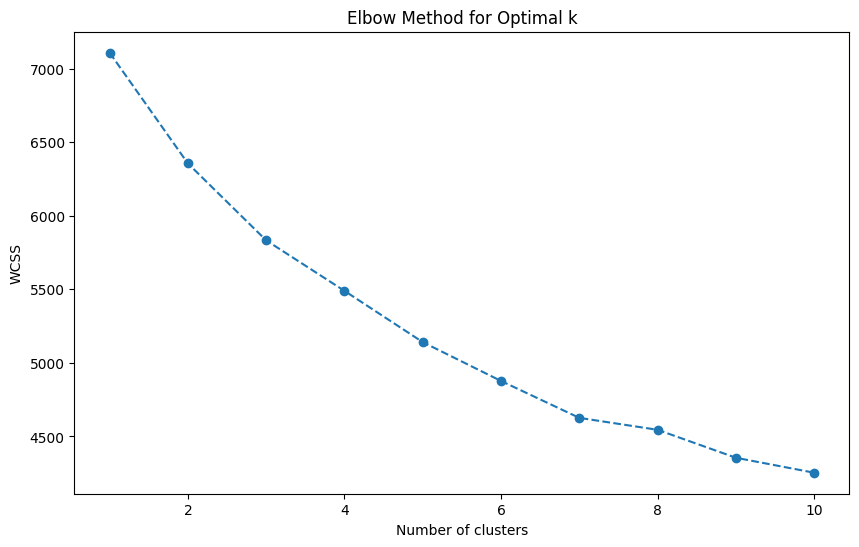

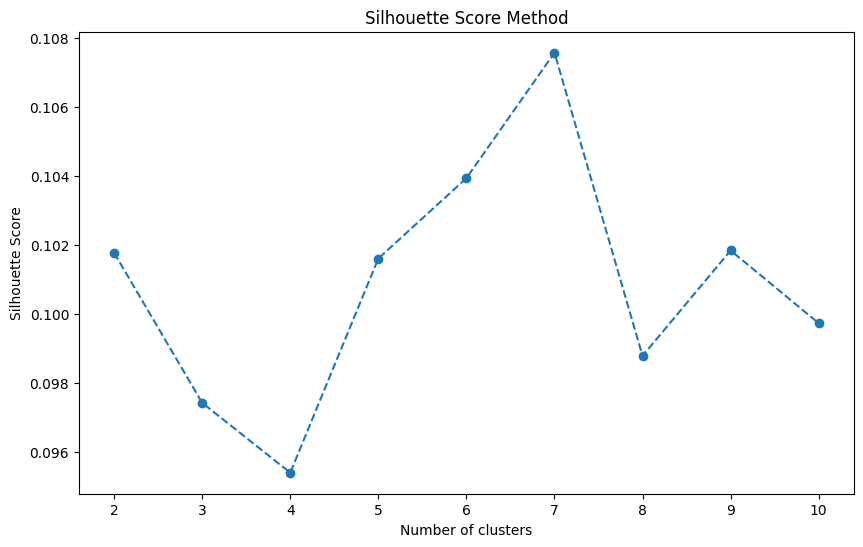

In [22]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o',linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)
    

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o',linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

##### 12. Model Training and Visualisation

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

df['cluster'] = kmeans.labels_

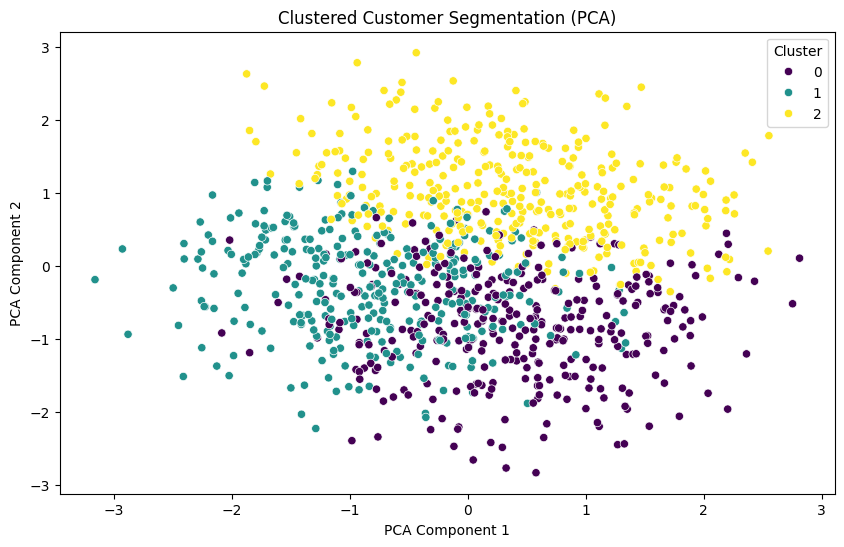

In [24]:
# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df.drop('cluster', axis=1, errors='ignore'))

# Add PCA components to DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Initialize K-means with K=3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df.drop(['cluster', 'PCA1', 'PCA2'], axis=1, errors='ignore'))

# Add cluster labels to the original data
df['cluster'] = labels
joblib.dump(kmeans, "kmeans.pkl")

# Visualize clusters based on PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df, palette='viridis')
plt.title('Clustered Customer Segmentation (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()


##### 13. Profiling and Interpreting Clusters

In [25]:
Label_0 = df[df['cluster'] == 0]
Label_1 = df[df['cluster'] == 1]
Label_2 = df[df['cluster'] == 2]

In [26]:
print(f"Label 0 shape is: {Label_0.shape}")
print(f"Label 1 shape is: {Label_1.shape}")
print(f"Label 2 shape is: {Label_2.shape}")

Label 0 shape is: (325, 15)
Label 1 shape is: (325, 15)
Label 2 shape is: (350, 15)


In [27]:
data["Clusters"] = labels

In [28]:
Segment1 = data.loc[(data["Clusters"] == 0)]
Segment2 = data.loc[(data["Clusters"] == 1)]
Segment3 = data.loc[(data["Clusters"] == 2)]

In [29]:
Segment1.head(2)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Clusters
id,,,,,,,,,
2,21,Female,78852,60,2,42,Sports,41.93,0
6,31,Other,57305,24,3,30,Home & Garden,86.85,0


In [30]:
Segment2.head(2)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Clusters
id,,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53,1
3,60,Female,126573,30,2,28,Clothing,424.36,1


In [31]:
Segment3.head(2)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Clusters
id,,,,,,,,,
4,40,Other,47099,74,9,5,Home & Garden,991.93,2
8,43,Male,108115,94,9,27,Groceries,734.56,2


##### 14. Business Recommendations

In [32]:
# Only select numeric columns for the groupby mean
numeric_data = data.select_dtypes(include='number')

# Combine numeric data with cluster labels
numeric_data['Clusters'] = data['Clusters']

cluster_profile = numeric_data.groupby('Clusters').mean()

cluster_profile['size'] = data['Clusters'].value_counts()
cluster_profile
# df

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,size
Clusters,,,,,,,
0,30.181538,90800.246154,43.046154,6.073846,34.578462,449.428185,325
1,47.920000,97625.316923,55.055385,4.790769,17.916923,249.289200,325
2,52.571429,77892.834286,53.720000,5.537143,27.242857,757.901486,350


C:\Users\ddeep\AppData\Local\Temp\ipykernel_18136\674435771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters', y='age', data=data, palette='viridis')


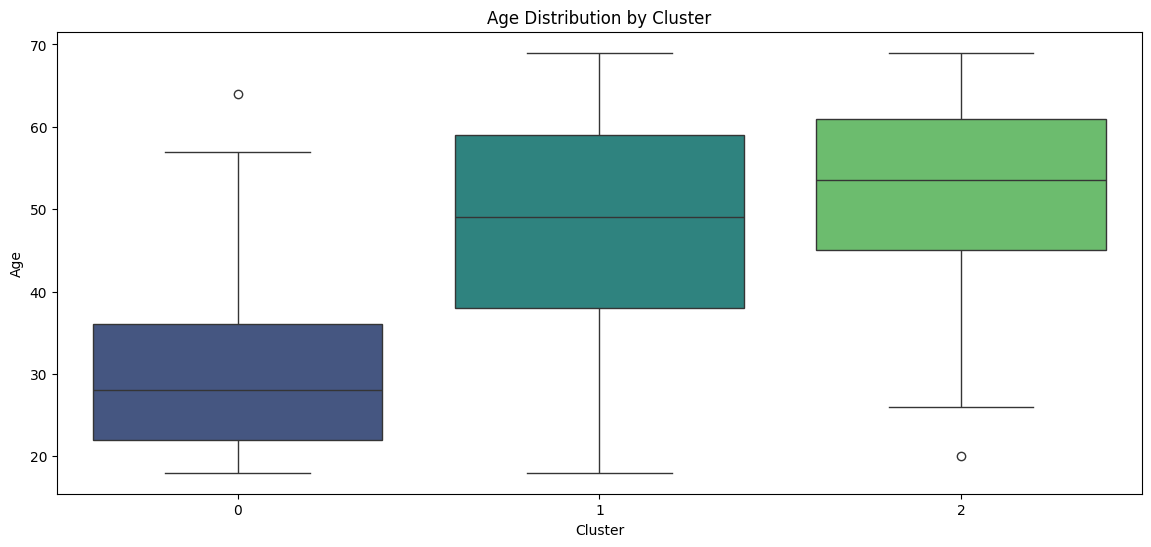

C:\Users\ddeep\AppData\Local\Temp\ipykernel_18136\674435771.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters', y='last_purchase_amount', data=data, palette='viridis')


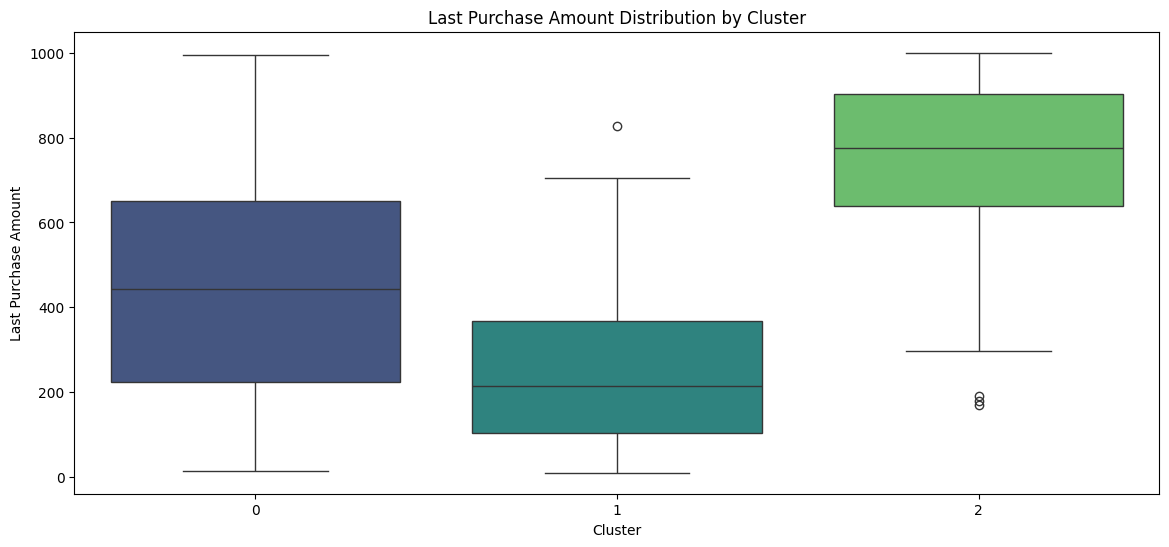

In [33]:
# Visualize Age Distribution for each Cluster
plt.figure(figsize=(14, 6))
sns.boxplot(x='Clusters', y='age', data=data, palette='viridis')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

# Visualize Last Purchase Amount Distribution for each Cluster
plt.figure(figsize=(14, 6))
sns.boxplot(x='Clusters', y='last_purchase_amount', data=data, palette='viridis')
plt.title('Last Purchase Amount Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Last Purchase Amount')
plt.show()


##### Cluster Characteristics

In [34]:
s = Segment1['preferred_category'].fillna('No')
counts = s.value_counts()
percent  = s.value_counts(normalize=True)
percent100  = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percentage': percent100})

,Counts,Percentage
preferred_category,,
Home & Garden,72,22.2%
Electronics,70,21.5%
Sports,67,20.6%
Groceries,65,20.0%
Clothing,51,15.7%


In [35]:
s = Segment2['preferred_category'].fillna('No')
counts = s.value_counts()
percent  = s.value_counts(normalize=True)
percent100  = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percentage': percent100})

,Counts,Percentage
preferred_category,,
Groceries,71,21.8%
Sports,69,21.2%
Electronics,68,20.9%
Clothing,60,18.5%
Home & Garden,57,17.5%


In [36]:
s = Segment3['preferred_category'].fillna('No')
counts = s.value_counts()
percent  = s.value_counts(normalize=True)
percent100  = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percentage': percent100})

,Counts,Percentage
preferred_category,,
Home & Garden,77,22.0%
Electronics,77,22.0%
Sports,74,21.1%
Groceries,63,18.0%
Clothing,59,16.9%


In [37]:
s = Segment1['gender'].fillna('No')
counts = s.value_counts()
percent  = s.value_counts(normalize=True)
percent100  = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percentage': percent100})

,Counts,Percentage
gender,,
Male,139,42.8%
Female,102,31.4%
Other,84,25.8%


In [38]:
s = Segment2['gender'].fillna('No')
counts = s.value_counts()
percent  = s.value_counts(normalize=True)
percent100  = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percentage': percent100})

,Counts,Percentage
gender,,
Female,124,38.2%
Other,103,31.7%
Male,98,30.2%


In [39]:
s = Segment3['gender'].fillna('No')
counts = s.value_counts()
percent  = s.value_counts(normalize=True)
percent100  = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percentage': percent100})

,Counts,Percentage
gender,,
Other,140,40.0%
Male,120,34.3%
Female,90,25.7%


### **Cluster Characteristics**

#### Segment 1:

- **Average Age:** 30  
- **Average Income:** 90,800  
- **Gender:** Male  
- **Spending Score:** 43  
- **Purchase Frequency:** 34  
- **Membership Years:** 6  
- **Most preferred category:** Home & Garden  

---

#### Segment 2:

- **Average Age:** 47  
- **Average Income:** 97,625  
- **Gender:** Female  
- **Spending Score:** 55  
- **Purchase Frequency:** 17  
- **Membership Years:** 4
- **Most preferred category:** Groceries  

---

#### Segment 3:

- **Average Age:** 52  
- **Average Income:** 77,892  
- **Gender:** Other  
- **Spending Score:** 53  
- **Purchase Frequency:** 27  
- **Membership Years:** 5
- **Most preferred category:** Home & Garden  


In [40]:
# import joblib

# # Save the model
# joblib.dump(kmeans, "kmeans_model.pkl")

# # Save the scaler
# joblib.dump(scaler, "scaler.pkl")


In [41]:
# df.head(2)

In [42]:
# import json
# columns = ['age', 'income', 'spending_score', 'membership_years',
# 'purchase_frequency', 'last_purchase_amount', 'gender_Male', 'preferred_category_Electronics','gender_Other','preferred_category_Groceries','preferred_category_Home & Garden','preferred_category_Sports','cluster','PCA1','PCA2']
# with open('model_columns.json', 'w') as f:
#     json.dump(columns, f)


In [43]:
# Save the PCA object
# joblib.dump(pca, "pca.pkl")

In [44]:
# import json

# # List of original feature columns used in training
# original_columns = [
#     'age', 'income', 'spending_score', 'membership_years', 
#     'purchase_frequency', 'last_purchase_amount', 'gender_Male', 
#     'preferred_category_Electronics', 'preferred_category_Fashion', 
#     'preferred_category_Grocery'
# ]

# # Columns after applying scaling and PCA
# model_columns = original_columns + ['PCA1', 'PCA2']

# # Save to model_columns.json
# with open('model_columns.json', 'w') as f:
#     json.dump(model_columns, f)

# print("✅ model_columns.json has been created")


In [45]:
df.head(2)

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports,cluster,PCA1,PCA2
id,,,,,,,,,,,,,,,
1,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,False,False,False,True,False,False,1,-0.851691,-1.029516
2,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,False,False,False,False,False,True,0,-0.295275,-1.825400
